In [1]:
import matplotlib.pyplot as plt
from numpy import array, arange, linspace
from scipy.integrate import odeint

In [2]:
g = 9.81         # Acceleration due to gravity
a = 0.0          # Initial time
b = 10.0         # Final time
N = 1000         # Number of Runge-Kutta steps
h = (b-a)/N      # Size of Runge-Kutta steps
target = 1e-10   # Target accuracy for binary search

In [3]:
# Function for Runge-Kutta calculation
def f(r):
    x = r[0]
    y = r[1]
    fx = y 
    fy = -g
    return array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = array([0.0,v],float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

def func(ci, t):
    y = ci[0]
    dy = ci[1]
    ddy = -g
    return( array([dy, ddy], float) )

In [9]:
# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

tt = linspace(a, b, 1000)
p01 = [0.0, v1]
p02 = [0.0, v2]

out1 = odeint(func, p01, tt)
out2 = odeint(func, p02, tt)

h1 = out1[999,0]
h2 = out2[999,0]

while abs(h2-h1)>target:
    vp = (v1+v2)/2
    #hp = height(vp)
    p0Hp = [0.0, vp]
    outHp = odeint(func, p0Hp, tt)
    hp = outHp[999,0]
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s


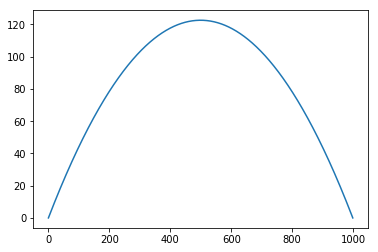

In [10]:
plt.plot(outHp[:,0])
plt.show()